In [207]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
import glob
import string

from sklearn.model_selection import train_test_split


# Carregar Dados

In [208]:
files=glob.glob('../archive/*.csv')
files

['../archive/parque_nacional_iguacu.csv',
 '../archive/parque_chapada_dos_veadeiros.csv',
 '../archive/museu_imperial.csv',
 '../archive/mercado-central-fortaleza-ce.csv',
 '../archive/jardim_botanico.csv',
 '../archive/aqua-rio-rj.csv',
 '../archive/mercado-ver-o-peso-pa.csv',
 '../archive/praia-copacabana-rj.csv',
 '../archive/elevador_lacerda.csv',
 '../archive/pelourinho_ba.csv',
 '../archive/museu_arte_sp.csv',
 '../archive/praca-3-poderes-br.csv',
 '../archive/parque_jalapao.csv',
 '../archive/hopi_hari.csv',
 '../archive/beto-carreiro-sc.csv']

In [209]:
#dados ser√° um dicion√°rio com os coment√°rios e as notas de cada usu√°rio
# as chaves do dicion√°rio s√£o os nomes dos destinos tur√≠sticos

dados={}

for file in files:
    dados[file.split('/')[-1].split('.')[0]]=pd.read_csv(file, delimiter=';')



In [210]:
dados.keys()
nomes_destinos=list(dados.keys())

# An√°lise Explorat√≥ria - Notas

## Comparativo entre as notas das atra√ß√µes

In [211]:
#Verificando a exist√™ncia de entradas nulas
print('N√∫mero de entradas nulas para as notas das atra√ß√µes:')
print('')
for nome in nomes_destinos:
    print(nome+ ' : {}'.format(dados[nome]['nota'].isnull().sum()))

N√∫mero de entradas nulas para as notas das atra√ß√µes:

parque_nacional_iguacu : 0
parque_chapada_dos_veadeiros : 0
museu_imperial : 0
mercado-central-fortaleza-ce : 0
jardim_botanico : 0
aqua-rio-rj : 0
mercado-ver-o-peso-pa : 0
praia-copacabana-rj : 0
elevador_lacerda : 0
pelourinho_ba : 0
museu_arte_sp : 0
praca-3-poderes-br : 0
parque_jalapao : 0
hopi_hari : 0
beto-carreiro-sc : 0


In [212]:
 
def calcular_proporcao_notas(dados):
    '''
    Fun√ß√£o exibe o n√∫mero de votos que atribuiu cada nota e a propor√ß√£o desse n√∫mero de votos em rela√ß√£o ao total 
    de votos para a atra√ß√£o selecionada

    input - dicion√°rio com conjunto de dados para cada atra√ß√£o

    '''
    cont=0
    print('N√∫mero correpondente a cada atra√ß√£o')
    for i in dados.keys():
        print(str(cont) +'-' +i )
        cont+=1
    
    
    num=None
    while num not in np.arange(0,15):
        try:
            num=input('Selecione a atra√ß√£o (digite o n√∫mero correpondente a atra√ß√£o desejada ou -1 para sair): ')
            num=int(num)
            if num not in np.arange(0,15):
                raise Exception()
        except:
            if num==-1:
                return None
            print('Entrada Inv√°lida. Digite o n√∫mero da atra√ß√£o desejada ou -1 para sair')
    nome_atracao=list(dados.keys())[num]
    dados_atracao=dados[nome_atracao]
    notas_atracao=dados_atracao.groupby('nota').agg(N√∫mero_de_Avalia√ß√µes=('nota','count'))
    notas_atracao['Propor√ß√£o de Avalia√ß√µes']=notas_atracao['N√∫mero_de_Avalia√ß√µes']/notas_atracao['N√∫mero_de_Avalia√ß√µes'].sum()
    print('')
    print('Nome da atra√ß√£o: {}'.format(nome_atracao))
    print('Total de avalia√ß√µes: {}'.format(notas_atracao['N√∫mero_de_Avalia√ß√µes'].sum()))
    print(notas_atracao)
    

    
                 

In [213]:
proporcao_notas=[]
for destino in nomes_destinos:
    #x=dados[nome_atracao].groupby('nota').agg(Total=('nota','count'))
    proporcao_notas+=[[(dados[destino]['nota']==nota).sum() for nota in [1,2,3,4,5]]]
proporcao_notas=pd.DataFrame(proporcao_notas,index=nomes_destinos)
proporcao_notas["Total Avalia√ß√µes"]=proporcao_notas.sum(axis=1)
proporcao_notas.iloc[:,:5]=proporcao_notas.iloc[:,:5].div(proporcao_notas["Total Avalia√ß√µes"],axis=0)
proporcao_notas.columns=   ['nota 1(%)',
                            'nota 2(%)',
                            'nota 3(%)',
                            'nota 4(%)',
                            'nota 5(%)',
                             "Total Avalia√ß√µes"]

In [214]:
proporcao_notas

nota 1(%)  nota 2(%)  nota 3(%)  nota 4(%)  \
parque_nacional_iguacu         0.001532   0.001892   0.011715   0.126881   
parque_chapada_dos_veadeiros   0.002203   0.003672   0.021667   0.148366   
museu_imperial                 0.002822   0.005080   0.034994   0.247778   
mercado-central-fortaleza-ce   0.012190   0.028059   0.194112   0.402254   
jardim_botanico                0.001403   0.003724   0.050498   0.253458   
aqua-rio-rj                    0.025720   0.048583   0.150750   0.322220   
mercado-ver-o-peso-pa          0.046576   0.079845   0.222345   0.319379   
praia-copacabana-rj            0.011091   0.023617   0.117563   0.278314   
elevador_lacerda               0.026991   0.064808   0.278066   0.317959   
pelourinho_ba                  0.024637   0.040003   0.165692   0.352347   
museu_arte_sp                  0.004138   0.010760   0.060420   0.275782   
praca-3-poderes-br             0.006485   0.016537   0.150778   0.372568   
parque_jalapao                 0.000000   0.007519   0.007519   0.180451   
hopi_hari                      0.164688   0.139466   0.229228   0.212413   
beto-carreiro-sc               0.093956   0.056684   0.080756   0.203572   

                              nota 5(%)  Total Avalia√ß√µes  
parque_nacional_iguacu         0.857980             11097  
parque_chapada_dos_veadeiros   0.824091              2723  
museu_imperial                 0.709327              7087  
mercado-central-fortaleza-ce   0.363385              4348  
jardim_botanico                0.690916             20674  
aqua-rio-rj                    0.452727              4199  
mercado-ver-o-peso-pa          0.331855              3607  
praia-copacabana-rj            0.569415              7664  
elevador_lacerda               0.312176              6743  
pelourinho_ba                  0.417321             11974  
museu_arte_sp                  0.648899              6041  
praca-3-poderes-br             0.453632              3084  
parque_jalapao                 0.804511               133  
hopi_hari                      0.254204              4044  
beto-carreiro-sc               0.565032              7727

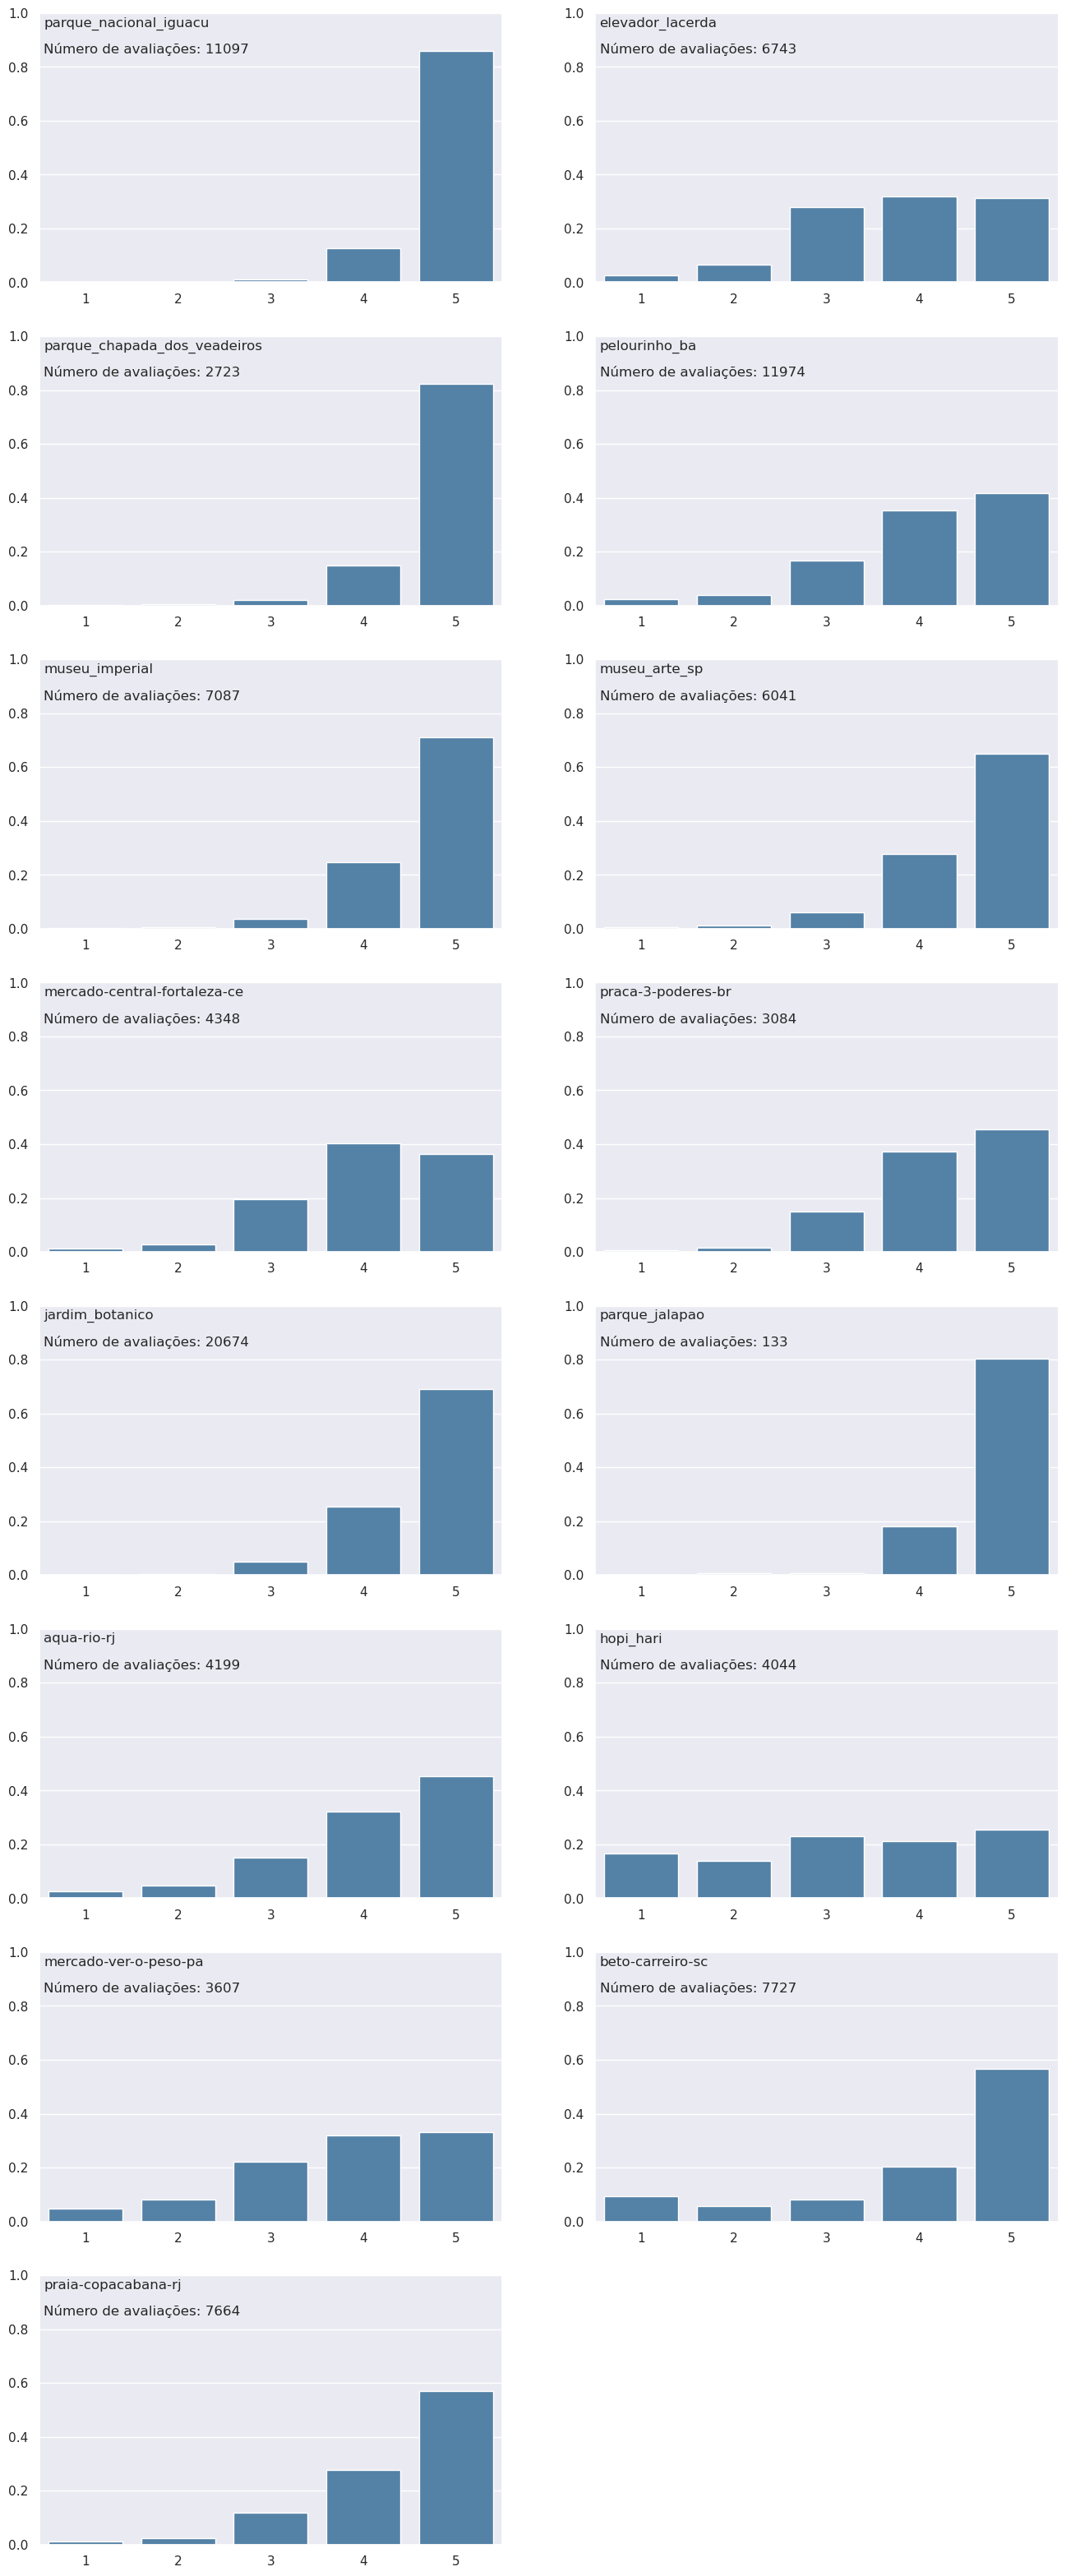

In [215]:
#Plotar graficos com as propor√ß√µes das avalia√ß√µes para cada atra√ß√£o
fig,axs=plt.subplots(8,2,figsize=(16,40))
sns.set_theme(style='darkgrid')
row_subplot=0
col_subplot=0
plt.title('Propor√ß√£o das avalia√ß√µes para cada atra√ß√£o')
for num_destino in range(len(proporcao_notas)):
    destino=proporcao_notas.index[num_destino]
    ax=sns.barplot(x=[1,2,3,4,5],y=proporcao_notas.iloc[num_destino,:5],ax=axs[row_subplot,col_subplot],color='steelblue')
    ax.text(-0.45, 0.95, destino)
    ax.text(-0.45, 0.85, "N√∫mero de avalia√ß√µes: {}".format(proporcao_notas.loc[destino,'Total Avalia√ß√µes']))
    ax.set(ylabel=None)
    ax.set_ylim(0,1)
    row_subplot+=1
    if row_subplot>7:
        row_subplot=0
        col_subplot=1
fig.delaxes(axs[7][1])


In [216]:
#Cria√ß√£o de dataframe com propor√ß√£o de avalia√ß√µes negativas, neutras e positivas

#Avalia√ß√£o negativa - notas 1 e 2
#Avalia√ß√£o neutra   - nota 3
#Avalia√ß√£o positiva - notas 4 e 5


pos_neutra_neg=pd.concat((proporcao_notas.iloc[:,:2].sum(axis=1),
                          proporcao_notas.iloc[:,2],
                          proporcao_notas.iloc[:,3:5].sum(axis=1)),axis=1)
pos_neutra_neg.columns=['Negativas(%)',
                        'Neutras(%)',
                        'Positivas(%)']

pos_neutra_neg

Negativas(%)  Neutras(%)  Positivas(%)
parque_nacional_iguacu            0.003424    0.011715      0.984861
parque_chapada_dos_veadeiros      0.005876    0.021667      0.972457
museu_imperial                    0.007902    0.034994      0.957105
mercado-central-fortaleza-ce      0.040248    0.194112      0.765639
jardim_botanico                   0.005127    0.050498      0.944375
aqua-rio-rj                       0.074303    0.150750      0.774946
mercado-ver-o-peso-pa             0.126421    0.222345      0.651234
praia-copacabana-rj               0.034708    0.117563      0.847730
elevador_lacerda                  0.091799    0.278066      0.630135
pelourinho_ba                     0.064640    0.165692      0.769668
museu_arte_sp                     0.014898    0.060420      0.924681
praca-3-poderes-br                0.023022    0.150778      0.826200
parque_jalapao                    0.007519    0.007519      0.984962
hopi_hari                         0.304154    0.229228      0.466617
beto-carreiro-sc                  0.150641    0.080756      0.768604

[[<matplotlib.axis.YTick at 0x7fa85d711250>,

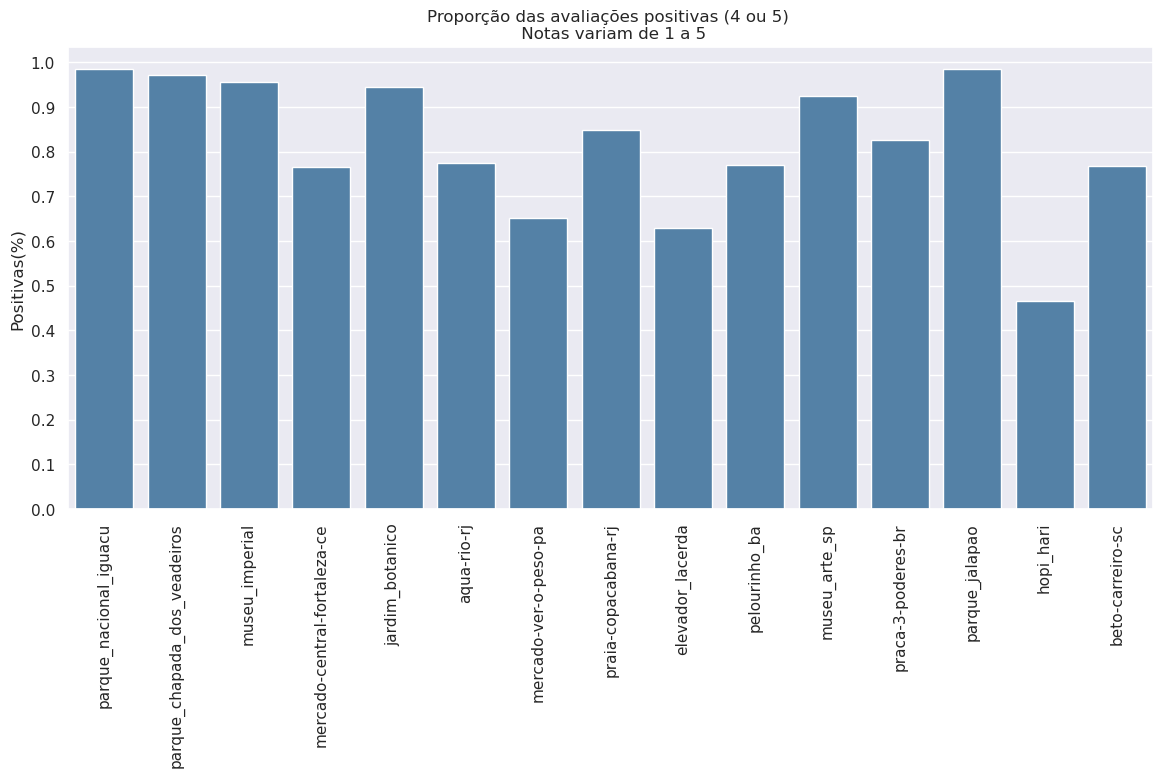

In [217]:
plt.figure(figsize=(14,6))
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
plt.title('Propor√ß√£o das avalia√ß√µes positivas (4 ou 5) \n Notas variam de 1 a 5')
g=sns.barplot(pos_neutra_neg,x=pos_neutra_neg.index,y=pos_neutra_neg['Positivas(%)'],color='steelblue')
g.set(yticks=np.arange(0,1.1,0.1))


[[<matplotlib.axis.YTick at 0x7fa85d7e0490>,

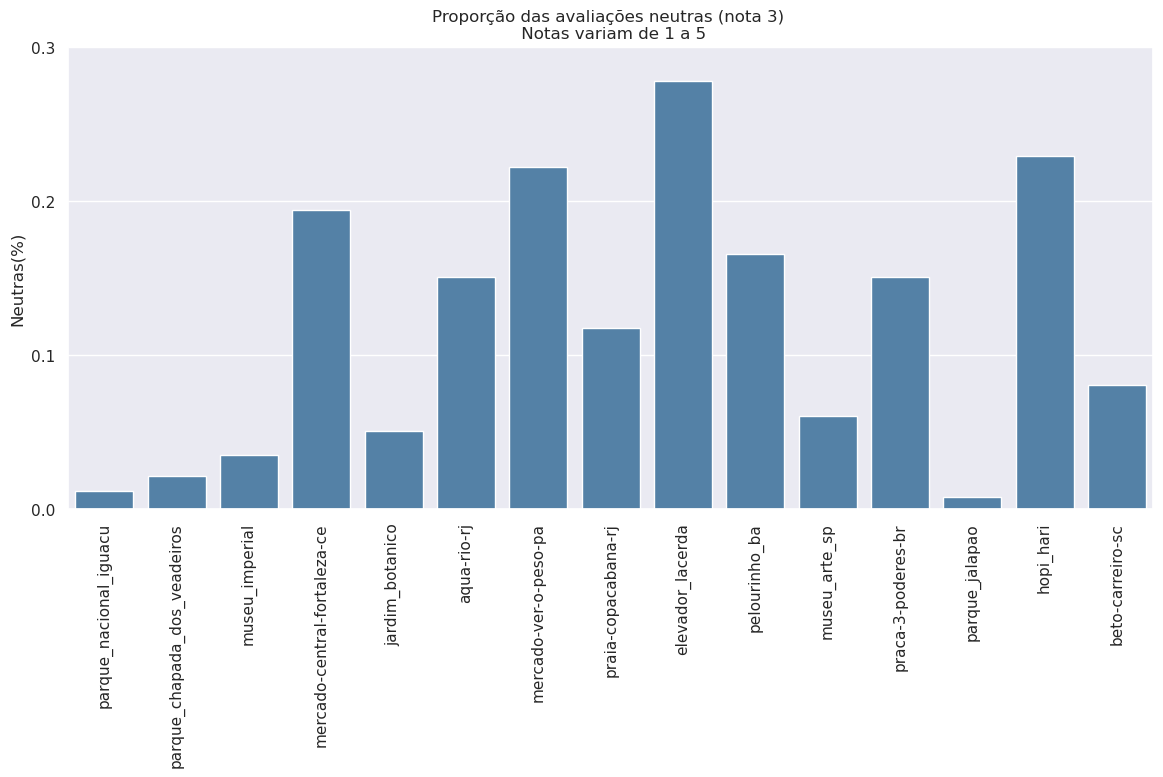

In [218]:
plt.figure(figsize=(14,6))
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
plt.title('Propor√ß√£o das avalia√ß√µes neutras (nota 3) \n Notas variam de 1 a 5')
g=sns.barplot(pos_neutra_neg,x=pos_neutra_neg.index,y=pos_neutra_neg['Neutras(%)'],color='steelblue')
g.set(yticks=np.arange(0,0.4,0.1))

[[<matplotlib.axis.YTick at 0x7fa85d85cd10>,

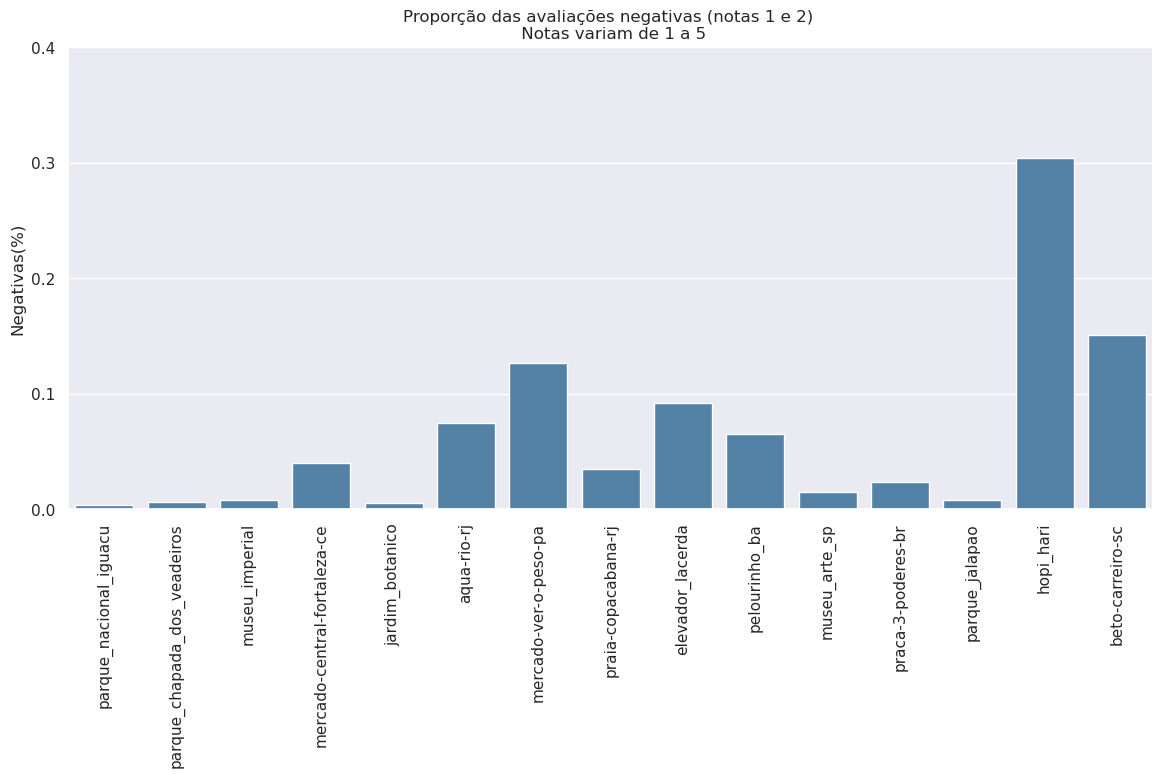

In [219]:
plt.figure(figsize=(14,6))
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
plt.title('Propor√ß√£o das avalia√ß√µes negativas (notas 1 e 2) \n Notas variam de 1 a 5')
g=sns.barplot(pos_neutra_neg,x=pos_neutra_neg.index,y=pos_neutra_neg['Negativas(%)'],color='steelblue')
g.set(yticks=np.arange(0,0.5,0.1))

In [220]:
'''
#Plotar graficos com as propor√ß√µes das avalia√ß√µes para cada atra√ß√£o
fig,axs=plt.subplots(8,2,figsize=(16,40))
row_subplot=0
col_subplot=0
for atracao in nome_atracoes:
    notas_atracao=dados[atracao]
    notas_atracao=notas_atracao.groupby('nota').agg(N√∫mero_de_Avalia√ß√µes=('nota','count'))
    notas_atracao['Propor√ß√£o de Avalia√ß√µes']=notas_atracao['N√∫mero_de_Avalia√ß√µes']/notas_atracao['N√∫mero_de_Avalia√ß√µes'].sum()
    notas_atracao.reset_index(inplace=True)
    ax=sns.barplot(notas_atracao,x='nota',y='Propor√ß√£o de Avalia√ß√µes',ax=axs[row_subplot,col_subplot],color='steelblue')
    ax.text(-0.45, 0.95, atracao)
    ax.text(-0.45, 0.85, "N√∫mero de avalia√ß√µes: {}".format(notas_atracao['N√∫mero_de_Avalia√ß√µes'].sum()))
    ax.set_ylim(0,1)
    row_subplot+=1
    if row_subplot>7:
        row_subplot=0
        col_subplot=1
fig.delaxes(axs[7][1])
'''

'\n#Plotar graficos com as propor√ß√µes das avalia√ß√µes para cada atra√ß√£o\nfig,axs=plt.subplots(8,2,figsize=(16,40))\nrow_subplot=0\ncol_subplot=0\nfor atracao in nome_atracoes:\n    notas_atracao=dados[atracao]\n    notas_atracao=notas_atracao.groupby(\'nota\').agg(N√∫mero_de_Avalia√ß√µes=(\'nota\',\'count\'))\n    notas_atracao[\'Propor√ß√£o de Avalia√ß√µes\']=notas_atracao[\'N√∫mero_de_Avalia√ß√µes\']/notas_atracao[\'N√∫mero_de_Avalia√ß√µes\'].sum()\n    notas_atracao.reset_index(inplace=True)\n    ax=sns.barplot(notas_atracao,x=\'nota\',y=\'Propor√ß√£o de Avalia√ß√µes\',ax=axs[row_subplot,col_subplot],color=\'steelblue\')\n    ax.text(-0.45, 0.95, atracao)\n    ax.text(-0.45, 0.85, "N√∫mero de avalia√ß√µes: {}".format(notas_atracao[\'N√∫mero_de_Avalia√ß√µes\'].sum()))\n    ax.set_ylim(0,1)\n    row_subplot+=1\n    if row_subplot>7:\n        row_subplot=0\n        col_subplot=1\nfig.delaxes(axs[7][1])\n'

In [221]:
#Avaliar datas

# An√°lise Explorat√≥ria - Coment√°rios

##  Dataset

In [222]:
#Agrupar os dados de todos os destinos em um mesmo dataframe

for nome_destino in nomes_destinos:
    dados[nome_destino]['destino']=nome_destino
df_dados=pd.concat([dados[destino] for destino in nomes_destinos],axis=0)

In [223]:
df_dados.head()

comentario  nota         data  \
0  N√£o tem como explicar, precisa ver de perto a ...   5.0  mar de 2023   
1  √≥timo lugar! tranquilo e com uma energia marav...   5.0  out de 2022   
2  Sensacional! O parque tem uma estrutura inigua...   5.0  fev de 2023   
3  √â um lugar fant√°stico para ser visitado. As qu...   5.0  fev de 2023   
4  O passeio de barco abaixo das quedas √© muito e...   5.0  fev de 2023   

                  destino  
0  parque_nacional_iguacu  
1  parque_nacional_iguacu  
2  parque_nacional_iguacu  
3  parque_nacional_iguacu  
4  parque_nacional_iguacu

In [224]:
x_comentarios=df_dados[['comentario']]
y_notas      =df_dados[['nota']]

In [225]:
#Dataset desbalanceado, s√£o poucas avalia√ß√µes com 1 ou 2 estrelas
y_notas.value_counts()

nota
5.0     58040
4.0     26829
3.0     10902
2.0      2974
1.0      2400
dtype: int64

In [226]:
#Aproximadamente 57% das avalia√ß√µes receberam nota 5
y_notas.value_counts()/len(y_notas)

nota
5.0     0.573830
4.0     0.265253
3.0     0.107786
2.0     0.029403
1.0     0.023728
dtype: float64

In [227]:
proporcao_notas_negativas=100*(y_notas.value_counts()[3:].sum())/len(y_notas)
print('Propor√ß√£o das avalia√ß√µes com notas 1 ou 2: {}%'.format(proporcao_notas_negativas))

Propor√ß√£o das avalia√ß√µes com notas 1 ou 2: 5.313164269118592%


In [228]:
#O conjunto de dados se≈ïa dividido em treino e teste (70% para treino e 20% para teste)
x_treino,x_teste,y_treino,y_teste=train_test_split(x_comentarios,y_notas,test_size=0.2,stratify=y_notas)

In [229]:
#A separa√ß√£o dos dados de treino e teste foi feito de modo estratificado, de modo que a propo√ß√£o de amostras de cada classe foi mantida ap√≥s a separa√ß√£o
y_treino.value_counts()/len(y_treino)
pd.concat((y_notas.value_counts()/len(y_notas),
           y_treino.value_counts()/len(y_treino),
           y_teste.value_counts()/len(y_teste)),axis=1).rename(columns={0:'conjunto total',1:'treino',2:'teste'})

conjunto total    treino     teste
nota                                    
5.0         0.573830  0.573830  0.573830
4.0         0.265253  0.265250  0.265263
3.0         0.107786  0.107791  0.107766
2.0         0.029403  0.029401  0.029413
1.0         0.023728  0.023728  0.023728

In [230]:
#Numero de amostras de cada nota nos dados de treino e teste
pd.concat((y_treino.value_counts(),y_teste.value_counts()),axis=1).rename(columns={0:'treino',1:'teste'})

treino  teste
nota               
5.0    46432  11608
4.0    21463   5366
3.0     8722   2180
2.0     2379    595
1.0     1920    480

In [231]:
#num_col_nota=list(df_dados.columns).index('nota')
#num_col_comentario=list(df_dados.columns).index('comentario')

## Pr√©-processamento dos coment√°rios

### Removendo a pontua√ß√£o dos coment√°rios

In [233]:
#Remover pontua√ß√£o dos coment√°rios usando o m√©todo translate

print('Com pontua√ß√£o: {}'.format(x_treino.iloc[0,0]))
x_treino['comentario']=x_treino['comentario'].apply(lambda x:x.translate(str.maketrans('','',string.punctuation)))
print('Sem pontua√ß√£o: {}'.format(x_treino.iloc[0,0]))


Com pontua√ß√£o: Gosto do Beto Carrero, a primeira vez q fomos em um feriado n√£o conseguimos brincar em nada, mas nada mesmo, fila quilom√©tricas , na segunda vez fomos em julho / 2018 dessa vez brincamos, mas em alguns brinquedos. .... j√° no m√™s de f√©rias em alta temporada ( JANEIRAO) acho que tivemos sorte,  brincamos em v√°rios brinquedos, minhas filhas ficaram super felizes e assistimos a dois shows .... um das piores coisas q acho l√° dentro √© o valor alto das refei√ß√µes e lanches e tb o pre√ßo abusivo da garrafinha de √°gua mineral R$ 5.00 e al√©m do mais n√£o tem bebedouro no parque para q possamos encher as garrafinhas, o ideal √© levar uma mochila com √°guas e lanches para fugir daqueles lanches mal preparados.....Pois sinceridade, a comida de l√° √© horr√≠vel. Eles t√™m q rever isso ...no mais o parque √© muito bonito... da pr√≥xima vez  n√£o irei em janeiro devido o calor intenso nunca senti tanto calor, logo quando sa√≠mos teve uma chuva muito forte e foi noticiado q 

### An√°lise da frequ√™ncia que cada palavra aparece nos coment√°rios com cada nota

In [239]:
#Contar o n√∫mero de vezes que cada palavra aparece nos coment√°rios relativos a cada nota e tamb√©m o n√∫mero total de vezes que cada palavra aparece
nota1_count=Counter()
nota2_count=Counter()
nota3_count=Counter()
nota4_count=Counter()
nota5_count=Counter()
total_count=Counter()

In [256]:
for num_row in range(len(x_treino)):
    if y_treino.iloc[num_row,0]==1:
        for palavra in x_treino.iloc[num_row,0].split(" "):
            nota1_count[palavra]+=1
            total_count[palavra]+=1

    elif y_treino.iloc[num_row,0]==2:
        for palavra in x_treino.iloc[num_row,0].split(" "):
            nota2_count[palavra]+=1
            total_count[palavra]+=1

    elif y_treino.iloc[num_row,0]==3:
        for palavra in x_treino.iloc[num_row,0].split(" "):
            nota3_count[palavra]+=1
            total_count[palavra]+=1

    elif y_treino.iloc[num_row,0]==4:
        for palavra in x_treino.iloc[num_row,0].split(" "):
            nota4_count[palavra]+=1
            total_count[palavra]+=1

    else:
        for palavra in x_treino.iloc[num_row,0].split(" "):
            if palavra=='preparadosPois':
                teste=x_treino.iloc[num_row,0]
            nota5_count[palavra]+=1
            total_count[palavra]+=1

In [249]:
#Palavras mais comuns nos coment√°rios com nota 1
nota1_count.most_common()

[('de', 5689),
 ('e', 4905),
 ('que', 4090),
 ('o', 3561),
 ('a', 3399),
 ('n√£o', 2477),
 ('para', 2295),
 ('um', 1948),
 ('com', 1909),
 ('em', 1847),
 ('do', 1796),
 ('parque', 1795),
 ('', 1675),
 ('no', 1652),
 ('√©', 1606),
 ('mais', 1215),
 ('uma', 1209),
 ('na', 1087),
 ('os', 994),
 ('brinquedos', 970),
 ('da', 948),
 ('as', 936),
 ('se', 935),
 ('fila', 911),
 ('muito', 809),
 ('por', 801),
 ('filas', 674),
 ('sem', 641),
 ('tem', 629),
 ('ao', 621),
 ('dia', 609),
 ('N√£o', 605),
 ('mas', 604),
 ('O', 603),
 ('foi', 595),
 ('ir', 585),
 ('pra', 574),
 ('pessoas', 563),
 ('horas', 527),
 ('dos', 491),
 ('estava', 446),
 ('ou', 434),
 ('atra√ß√µes', 431),
 ('como', 425),
 ('s√≥', 417),
 ('pois', 406),
 ('ser', 398),
 ('lugar', 397),
 ('era', 379),
 ('brinquedo', 376),
 ('nos', 367),
 ('j√°', 360),
 ('l√°', 356),
 ('A', 354),
 ('das', 349),
 ('minha', 341),
 ('at√©', 329),
 ('2', 325),
 ('mesmo', 322),
 ('nem', 319),
 ('me', 313),
 ('voc√™', 311),
 ('local', 311),
 ('eu', 307),

In [259]:
#Palavras mais comuns nos coment√°rios com nota 5

nota5_count.most_common()

[('e', 143002),
 ('de', 134564),
 ('a', 100670),
 ('o', 77542),
 ('√©', 73696),
 ('para', 64818),
 ('que', 62414),
 ('com', 53816),
 ('do', 52952),
 ('um', 49902),
 ('', 49086),
 ('muito', 47168),
 ('da', 34592),
 ('uma', 33944),
 ('em', 32736),
 ('bem', 29024),
 ('n√£o', 28076),
 ('O', 26620),
 ('no', 26496),
 ('as', 24836),
 ('os', 24086),
 ('parque', 23456),
 ('mais', 21540),
 ('lugar', 19600),
 ('se', 19096),
 ('tem', 19032),
 ('na', 17484),
 ('pena', 16244),
 ('por', 14904),
 ('passeio', 14812),
 ('ao', 14724),
 ('dos', 14698),
 ('mas', 13674),
 ('s√£o', 13442),
 ('lindo', 13202),
 ('local', 12954),
 ('das', 12876),
 ('A', 12164),
 ('conhecer', 11654),
 ('ir', 10796),
 ('como', 10446),
 ('dia', 10272),
 ('visita', 10062),
 ('vale', 9724),
 ('cidade', 9384),
 ('tudo', 9324),
 ('√â', 8712),
 ('Vale', 8662),
 ('cuidado', 8644),
 ('ou', 8640),
 ('quem', 8532),
 ('pra', 8438),
 ('Curitiba', 8360),
 ('bom', 8344),
 ('visitar', 8200),
 ('Um', 7972),
 ('todos', 7880),
 ('voc√™', 7814),
 (

In [263]:
#Palavras menos comuns nos coment√°rios com nota 5
nota5_count.most_common()[-1:-20:-1]

[('xxxxxxxxxxx', 2),
 ('lindaVoltarei', 2),
 ('comservado', 2),
 ('transpondo', 2),
 ('tudoComida', 2),
 ('refugiados', 2),
 ('reaisUm', 2),
 ('s√£o10', 2),
 ('prefer√™nciaA', 2),
 ('freepassAlguns', 2),
 ('enooormesSou', 2),
 ('m√°gicoS√≥', 2),
 ('FridayO', 2),
 ('rodeam', 2),
 ('frequentamricos', 2),
 ('desconhecemos', 2),
 ('puxe', 2),
 ('horrorizados', 2),
 ('feiura', 2)]

In [ ]:
#Palavras menos comuns nos coment√°rios com nota 1
nota1_count.most_common()[-1:-20:-1]

'''
Comparando os coment√°rios com nota 1 e os coment√°rios com nota 5, √© poss√≠vel notar que as palavras mais frequentes em ambos se repetem, s√£o preposi√ß√µes e artigos como por exemplo e, que , de, do. Esses tipos de palavras aparecem comunmente em todo tipo de frase e n√£o servem para caracterizar um  coment√°rio. Deve-se buscar palavras que aparecem com mais frequ√™ncia em coment√°rios com determinada nota, espera-se por exemplo que uma palavra como excelente apare√ßa com maior frequ√™ncia em coment√°rios com nota 5.

J√° verificando as palavras que aparecem com menor frequ√™ncia, verifica-se a ocorr√™ncia de palavras com grafia errada e com erros de digita√ß√£o. Esse tipo de palavra n√£o s√£o √∫teis para identificar um coment√°rio
e ser√£o portanto removidas.

Para encontrar as palavras que aparecem com maior frequ√™ncia em coment√°rios com certa nota calcularei a raz√£o entre o n√∫mero de vezes que um coment√°rio aparece em  coment√°rios com determinada nota
pelo n√∫mero topal de vezes que a palavra apareceu nos coment√°rio. 



'''

In [253]:
def calcular_razao(counter_nota,counter_total):
    razao=Counter()
    for palavra in counter_nota:
        razao[palavra]=counter_nota[palavra]/counter_total[palavra]
    return razao
    

In [255]:
razao_nota5.most_common()

[('JANEIRAO', 1.0),
 ('preparadosPois', 1.0),
 ('inunda√ß√µes', 1.0),
 ('ventilado√ìtima', 1.0),
 ('colegasPre√ßos', 1.0),
 ('qualidadeAmei', 1.0),
 ('vestu√°riosH√°', 1.0),
 ('p√∫blicoBem', 1.0),
 ('ofertadasFica', 1.0),
 ('definindo', 1.0),
 ('dizir', 1.0),
 ('Caio', 1.0),
 ('lindoagrad√°vel', 1.0),
 ('mundo1', 1.0),
 ('N√£p', 1.0),
 ('qualqer', 1.0),
 ('chuveirosquiosque', 1.0),
 ('bicicletaPraia', 1.0),
 ('Ameiiiii', 1.0),
 ('diaestava', 1.0),
 ('visitaConta', 1.0),
 ('Yes', 1.0),
 ('energiza√ß√£o', 1.0),
 ('funcionamentoTodas', 1.0),
 ('tampando', 1.0),
 ('Raskabuska', 1.0),
 ('Stat', 1.0),
 ('R100dia', 1.0),
 ('ofertadas', 1.0),
 ('R4000dia', 1.0),
 ('gigantescaLimpeza', 1.0),
 ('mil√≠metro', 1.0),
 ('aprovam', 1.0),
 ('ArquivoA', 1.0),
 ('Erguida', 1.0),
 ('1959', 1.0),
 ('1987', 1.0),
 ('Zeno', 1.0),
 ('Zani', 1.0),
 ('lindeiroso', 1.0),
 ('internacionalmenteL√°', 1.0),
 ('animaisvale', 1.0),
 ('Ame', 1.0),
 ('pares', 1.0),
 ('legalPrincipalmente', 1.0),
 ('botando', 1.0),
 ('t

'Gosto do Beto Carrero a primeira vez q fomos em um feriado n√£o conseguimos brincar em nada mas nada mesmo fila quilom√©tricas  na segunda vez fomos em julho  2018 dessa vez brincamos mas em alguns brinquedos  j√° no m√™s de f√©rias em alta temporada  JANEIRAO acho que tivemos sorte  brincamos em v√°rios brinquedos minhas filhas ficaram super felizes e assistimos a dois shows  um das piores coisas q acho l√° dentro √© o valor alto das refei√ß√µes e lanches e tb o pre√ßo abusivo da garrafinha de √°gua mineral R 500 e al√©m do mais n√£o tem bebedouro no parque para q possamos encher as garrafinhas o ideal √© levar uma mochila com √°guas e lanches para fugir daqueles lanches mal preparadosPois sinceridade a comida de l√° √© horr√≠vel Eles t√™m q rever isso no mais o parque √© muito bonito da pr√≥xima vez  n√£o irei em janeiro devido o calor intenso nunca senti tanto calor logo quando sa√≠mos teve uma chuva muito forte e foi noticiado q em Penha havia tido v√°rias inunda√ß√µes no inverno 